In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
df=pd.read_csv('HR_comma_sep.csv')


In [9]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [10]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
df.rename(columns={"sales": "Department"}, inplace=True)

In [15]:
left_df = df[df['left'] == 1]
corr = left_df[['satisfaction_level', 'average_montly_hours']].corr()
print("Correlation between satisfaction level and avg monthly hours (left employees):")
print(corr)

Correlation between satisfaction level and avg monthly hours (left employees):
                      satisfaction_level  average_montly_hours
satisfaction_level              1.000000             -0.084117
average_montly_hours           -0.084117              1.000000


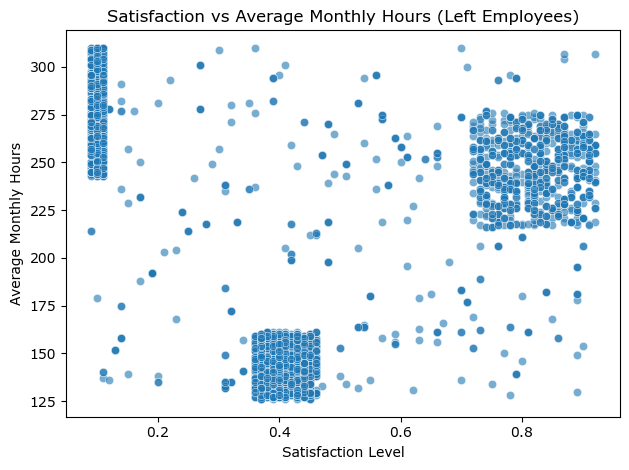

In [18]:
sns.scatterplot(data=left_df, x='satisfaction_level', y='average_montly_hours', alpha=0.6)
plt.title("Satisfaction vs Average Monthly Hours (Left Employees)")
plt.xlabel("Satisfaction Level")
plt.ylabel("Average Monthly Hours")
plt.tight_layout()
plt.show()

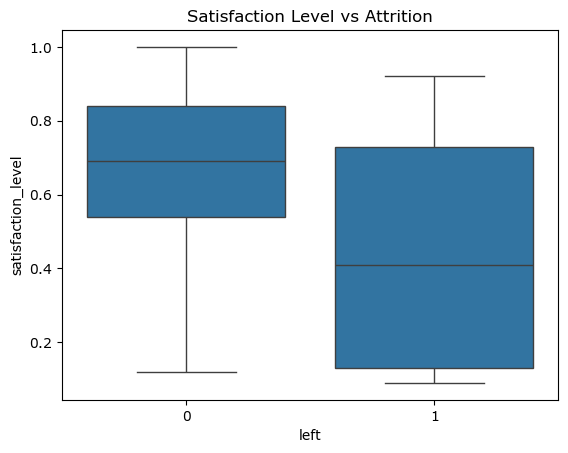

In [19]:
sns.boxplot(data=df, x='left', y='satisfaction_level')
plt.title("Satisfaction Level vs Attrition")
plt.show()

Text(0.5, 1.0, 'Salary Level vs Attrition')

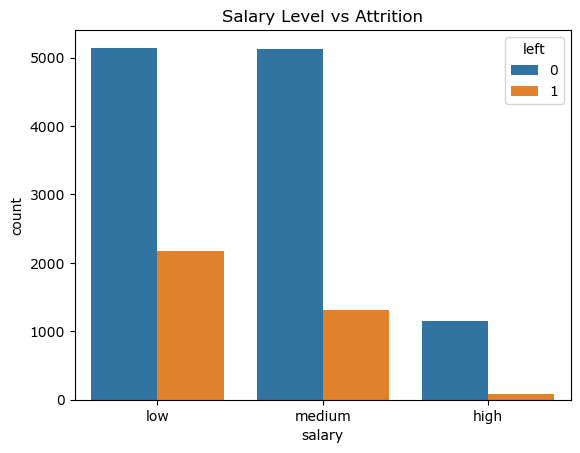

In [20]:
sns.countplot(data=df, x='salary', hue='left')
plt.title("Salary Level vs Attrition")

<Axes: xlabel='promotion_last_5years', ylabel='count'>

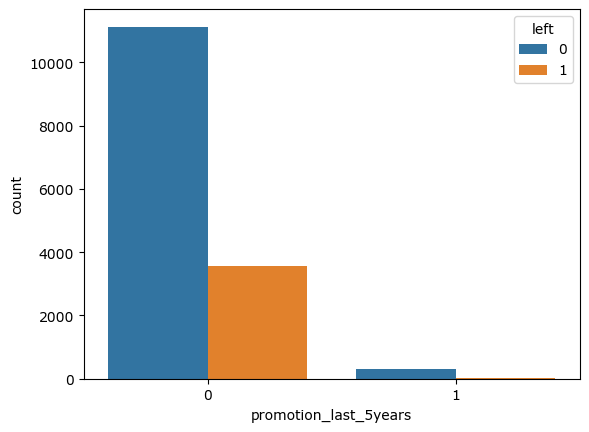

In [21]:
sns.countplot(data=df, x='promotion_last_5years', hue='left')

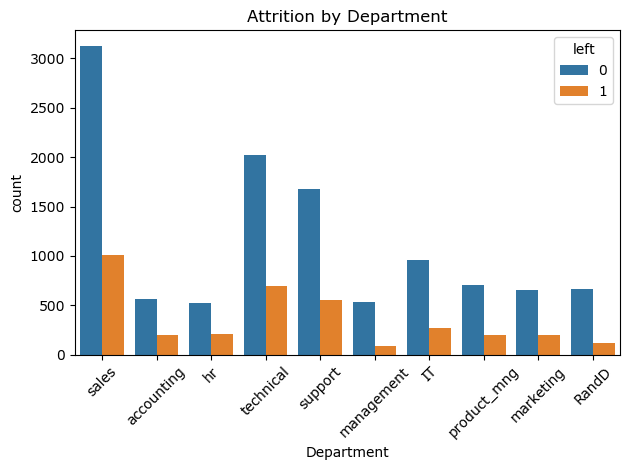

In [22]:
sns.countplot(data=df, x='Department', hue='left')
plt.xticks(rotation=45)
plt.title("Attrition by Department")
plt.tight_layout()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [24]:
for col in ['salary', 'Department']:
    df[col] = LabelEncoder().fit_transform(df[col])

In [26]:
X = df.drop('left', axis=1)
y = df['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9882222222222222
Confusion Matrix:
 [[3421    7]
 [  46 1026]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      3428
           1       0.99      0.96      0.97      1072

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



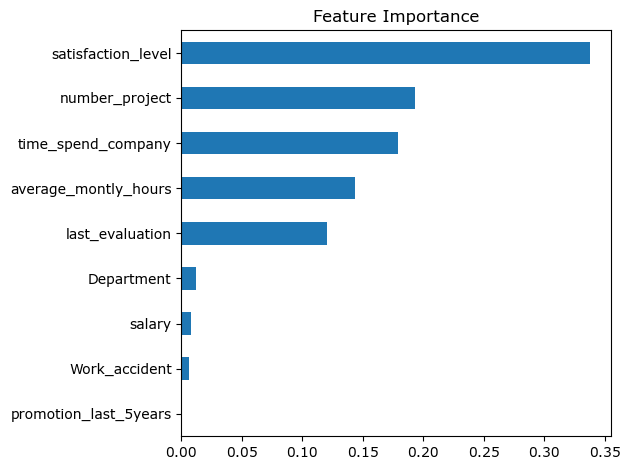

In [28]:
feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance.sort_values().plot(kind='barh', title='Feature Importance')
plt.tight_layout()